### In this notebook I will experiment different techniques to deal with NA values.
### I wiil use the udemy course "Feature Engineering for Machine Learning", from Soledad Galli, for principal references, but will use others sources too.
### I will use the data of the DSA January Competition. There is another repository(WIP) with the project.

In [1]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading data
df = pd.read_csv("Data/dataset_treino.csv")

In [3]:
df.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
id                   600 non-null int64
num_gestacoes        600 non-null int64
glicose              600 non-null int64
pressao_sanguinea    600 non-null int64
grossura_pele        600 non-null int64
insulina             600 non-null int64
bmi                  600 non-null float64
indice_historico     600 non-null float64
idade                600 non-null int64
classe               600 non-null int64
dtypes: float64(2), int64(8)
memory usage: 47.0 KB


##### In this case, we can assume that all the NA values was imputed with 0.
##### Except for 'num_gestacoes', to have a 0 for min value is impossible for a living human been, so, I will assume 0 as NA value.

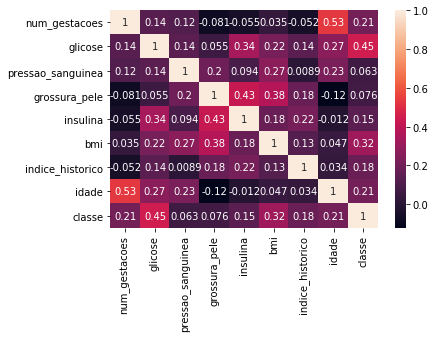

In [6]:
sns.heatmap(df.drop(['id'],axis=1).corr(), annot=True)

##### Starting with 'glicose'.
##### Condn't find any relationship whith other features that explain the missing values,
##### The same with some other information not present in the dataset. In this case, I will assume that the features has
##### missing data completely at random(MCAR).

In [7]:
df[df['glicose'] == 0]

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
75,76,1,0,48,20,0,24.7,0.140,22,0
182,183,1,0,74,20,23,27.7,0.299,21,0
342,343,1,0,68,35,0,32.0,0.389,22,0
349,350,5,0,80,32,0,41.0,0.346,37,1
502,503,6,0,68,41,0,39.0,0.727,41,1


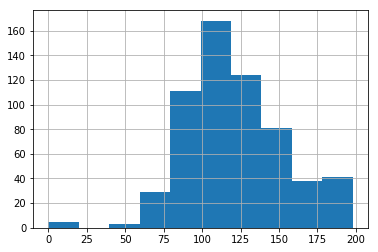

In [8]:
df['glicose'].hist()

#####  For a feature assumed MCAR, mean/median imputation is an option. As we could observe a (almost)gaussian distribution, the mean is a better choice

##### To reduce overfitting, the value used to impute the NA values should be found in the train set and used in the NA values
#### for train and test.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['id'], axis=1), df['classe'], test_size = .3, random_state = 0)

In [11]:
def naToMean(mean, feature, data):
    data[feature+'toMean'] = [mean if x == 0 else x for x in data[feature]]

In [12]:
mean = xtrain['glicose'].mean()
naToMean(mean, 'glicose', xtrain)
naToMean(mean, 'glicose', xtest)

#### Following by the correlation value, let's look to 'bmi'

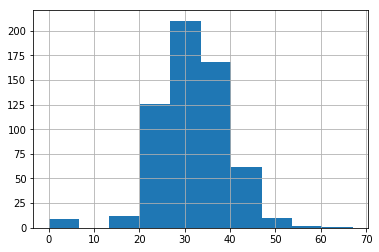

In [13]:
df['bmi'].hist()

In [14]:
df[df['bmi'] == 0]

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
9,10,8,125,96,0,0,0.0,0.232,54,1
49,50,7,105,0,0,0,0.0,0.305,24,0
60,61,2,84,0,0,0,0.0,0.304,21,0
81,82,2,74,0,0,0,0.0,0.102,22,0
145,146,0,102,75,23,0,0.0,0.572,21,0
371,372,0,118,64,23,89,0.0,1.731,21,0
426,427,0,94,0,0,0,0.0,0.256,25,0
494,495,3,80,0,0,0,0.0,0.174,22,0
522,523,6,114,0,0,0,0.0,0.189,26,0


##### 'bmi' has the same conditions of 'glucose' apparently.

In [15]:
mean = xtrain['bmi'].mean()
naToMean(mean, 'bmi', xtrain)
naToMean(mean, 'bmi', xtest)

##### 'idade' and 'num_gestacoes' has a high correlation with 'classe' but have high correlation one each other to, but doesen't have missing values, so I will skip then for now.

#### Same with 'indice_historico'.
#### Let's take a look in what is left

In [16]:
(len(df[df['insulina'] == 0]) / len(df)) * 100

48.16666666666667

In [17]:
(len(df[df['pressao_sanguinea'] == 0]) / len(df)) * 100

4.666666666666667

In [18]:
(len(df[df['grossura_pele'] == 0]) / len(df)) * 100

29.166666666666668

#### 'insulina' is missing data in almost half of the observations!
#### Why that happen? Could the missingness of the data has some information?
#### I will create a feature to capture that information, in the case that exists.
#### Also, the feature is skewed, so it is more apropriate to inpute NAs with the median.

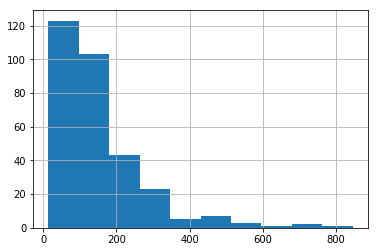

In [19]:
df[df['insulina'] != 0]['insulina'].hist()

In [20]:
xtrain['insulina_missingness'] = [1 if x != 0 else 0 for x in xtrain['insulina']]
xtest['insulina_missingness'] = [1 if x != 0 else 0 for x in xtest['insulina']]

In [21]:
mean = xtrain['insulina'].median()
naToMean(mean, 'insulina', xtrain)
naToMean(mean, 'insulina', xtest)

#### 'grossura_pele' could have the same situation about missingness information. I wiil try to capture that the same way.
#### Except for the NA values, it's more for a gaussian distribution, therefore, will use the mean here.

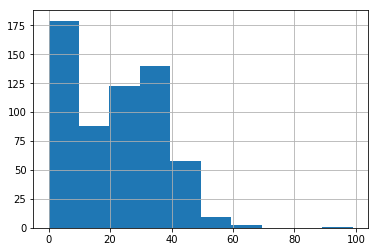

In [22]:
df['grossura_pele'].hist()

In [23]:
xtrain['grossura_pele_missingness'] = [1 if x != 0 else 0 for x in xtrain['grossura_pele']]
xtest['grossura_pele_missingness'] = [1 if x != 0 else 0 for x in xtest['grossura_pele']]

In [24]:
mean = xtrain['grossura_pele'].mean()
naToMean(mean, 'grossura_pele', xtrain)
naToMean(mean, 'grossura_pele', xtest)

#### And the last one, 'pressao_saguinea'

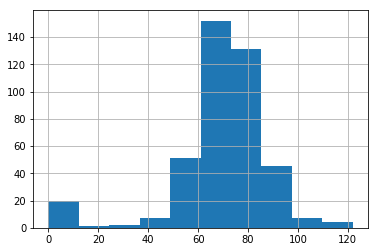

In [28]:
xtrain['pressao_sanguinea'].hist()

In [29]:
mean = xtrain['pressao_sanguinea'].mean()
naToMean(mean, 'pressao_sanguinea', xtrain)
naToMean(mean, 'pressao_sanguinea', xtest)

#### Now let's take a look and run some tests.

In [30]:
xtrain.head()

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe,glicosetoMean,bmitoMean,insulina_missingness,insulinatoMean,grossura_pele_missingness,grossura_peletoMean,pressao_sanguineatoMean
378,4,156,75,0,0,48.3,0.238,32,1,156.0,48.3,0,44.5,0,21.197619,75.0
581,6,109,60,27,0,25.0,0.206,27,0,109.0,25.0,0,44.5,1,27.000000,60.0
447,0,95,80,45,92,36.5,0.330,26,0,95.0,36.5,1,92.0,1,45.000000,80.0
252,2,90,80,14,55,24.4,0.249,24,0,90.0,24.4,1,55.0,1,14.000000,80.0
561,0,198,66,32,274,41.3,0.502,28,1,198.0,41.3,1,274.0,1,32.000000,66.0


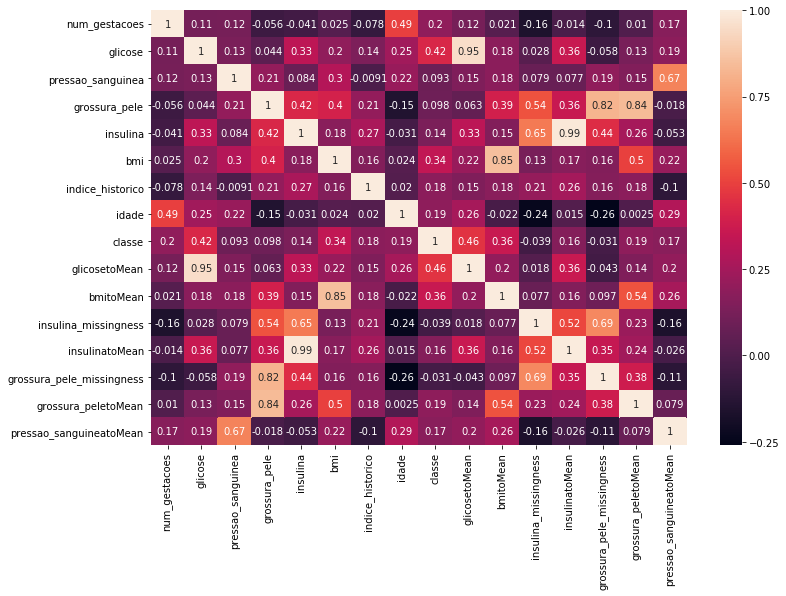

In [31]:
plt.subplots(figsize = (12,8))
sns.heatmap(xtrain.corr(), annot=True)

In [33]:
cols_to_use = ['num_gestacoes', 'indice_historico', 'glicosetoMean', 'bmitoMean', 'insulinatoMean', 'grossura_peletoMean',
       'pressao_sanguineatoMean']

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(xtrain[cols_to_use], ytrain)

C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
lr.score(xtrain[cols_to_use], ytrain)

0.7642857142857142

In [38]:
lr.score(xtest[cols_to_use], ytest)

0.8111111111111111

#### Not that bat, assuming that the only preprocessing done was the missing values.